In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Data Collection & Analysis

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


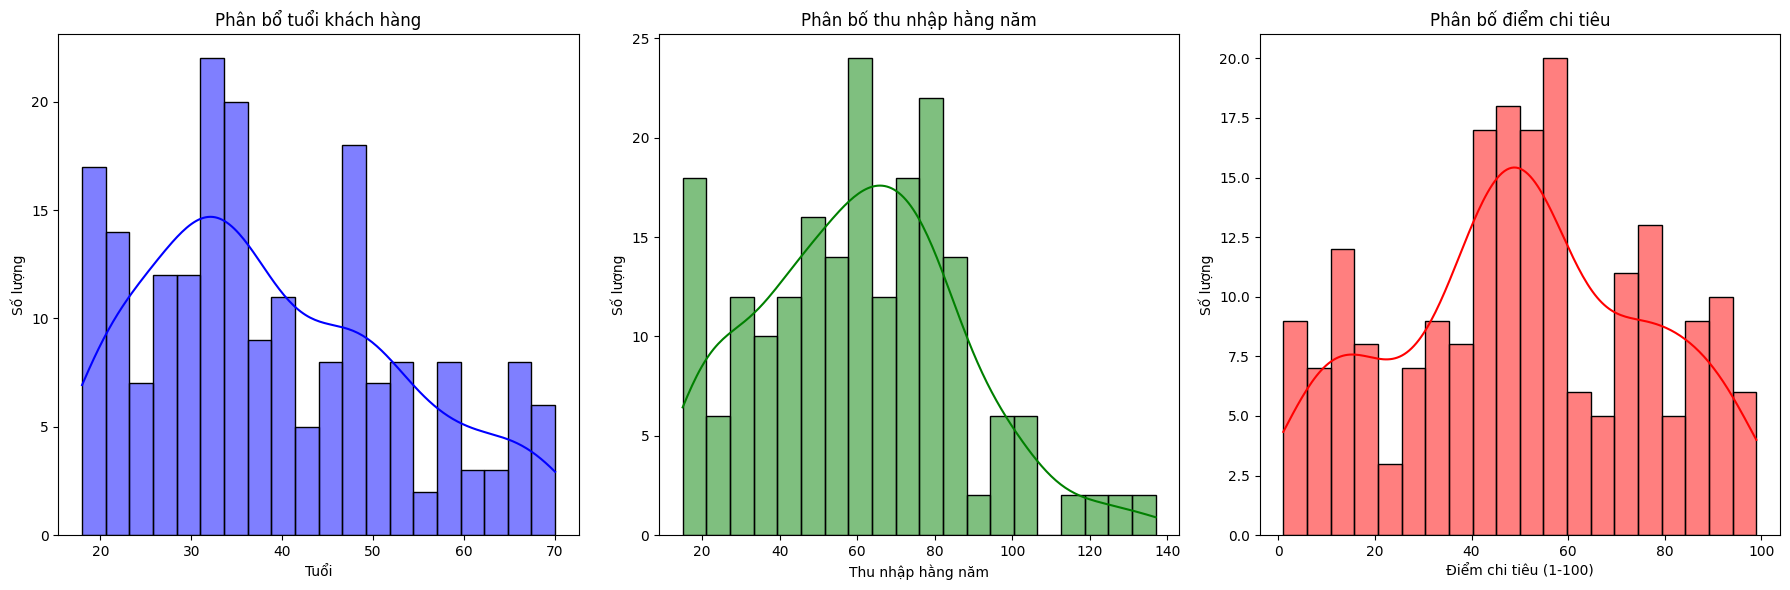

In [12]:
#Visualize Age, Anual Income, Spending Score
plt.figure(figsize=(18,6))

#Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Phân bổ tuổi khách hàng")
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')

#Anual Income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title("Phân bố thu nhập hằng năm")
plt.xlabel('Thu nhập hằng năm')
plt.ylabel('Số lượng')

#Spending Score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title("Phân bố điểm chi tiêu")
plt.xlabel('Điểm chi tiêu (1-100)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

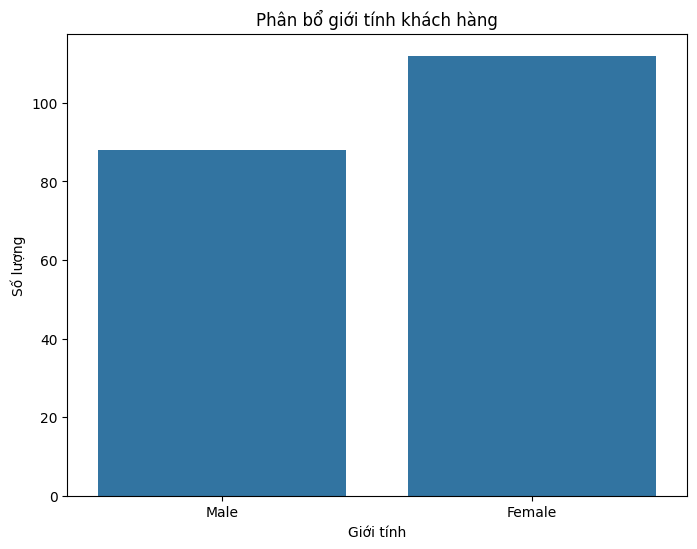

In [13]:
#Gender Visualize
plt.figure(figsize=(8,6))
sns.countplot(x='Genre', data=df)
plt.title('Phân bổ giới tính khách hàng')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.show()

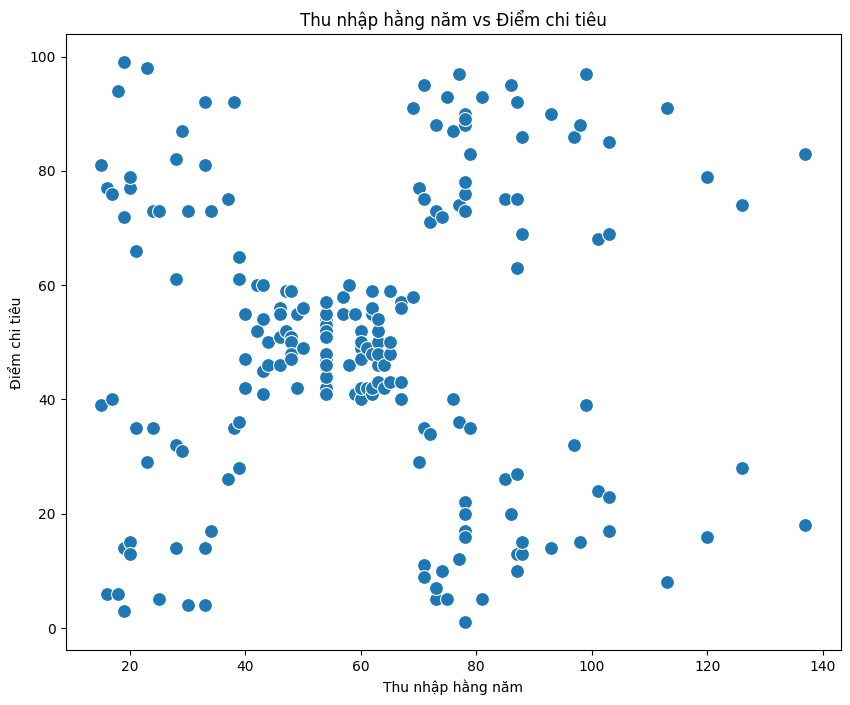

In [14]:
#Scatter plot for Annual Income and Spending Score
plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100)
plt.title('Thu nhập hằng năm vs Điểm chi tiêu')
plt.xlabel('Thu nhập hằng năm')
plt.ylabel('Điểm chi tiêu')
plt.show()

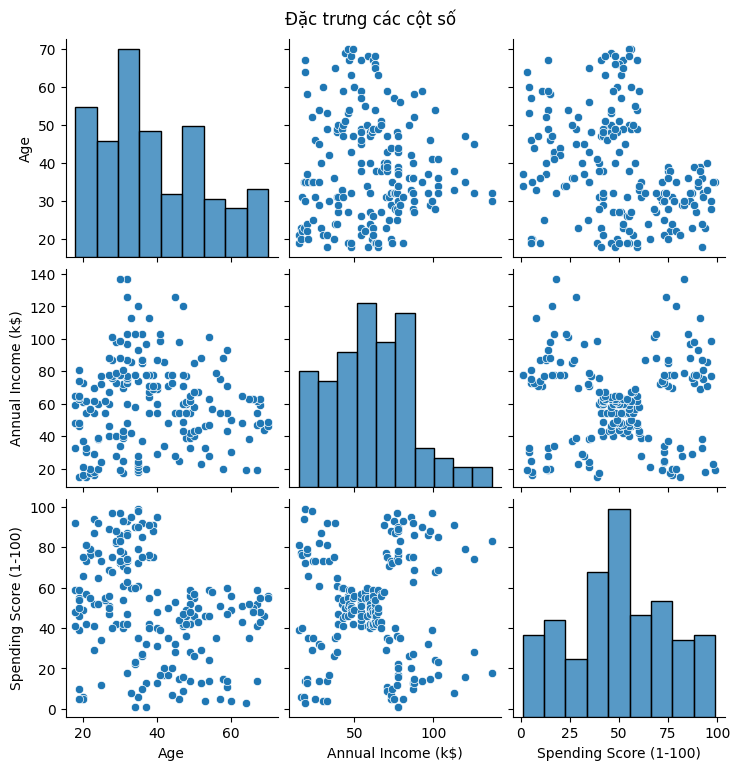

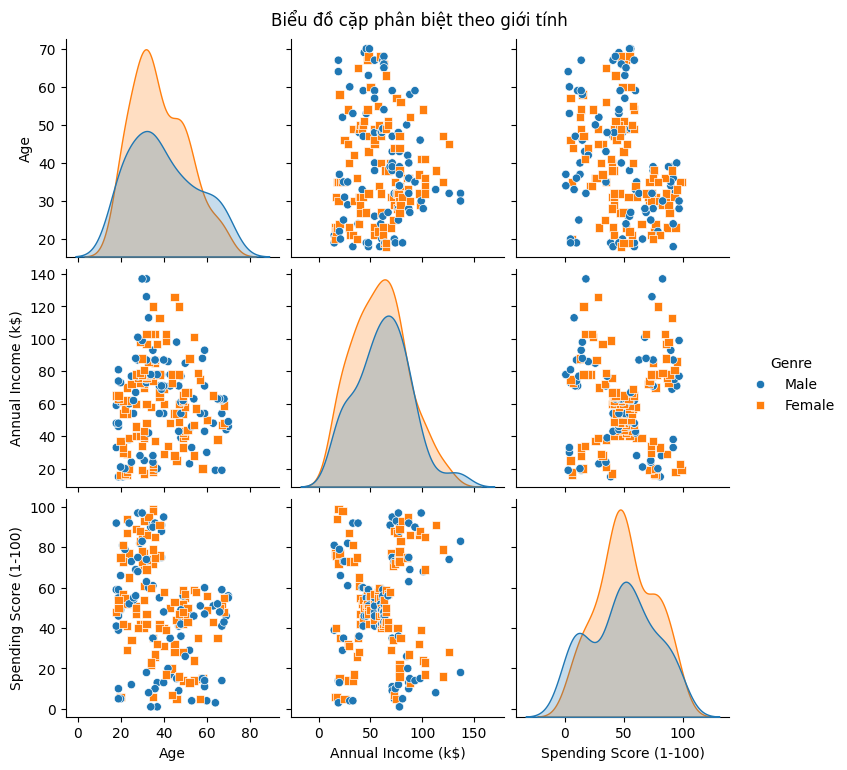

In [17]:
#pair plot for Gender
numerical = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

sns.pairplot(numerical)
plt.suptitle('Đặc trưng các cột số', y=1.02)
plt.show()

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Genre', markers=["o", "s"])
plt.suptitle('Biểu đồ cặp phân biệt theo giới tính', y=1.02)
plt.show()

### Feature Scaling

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [21]:
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [22]:
X_scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Clustering

In [23]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

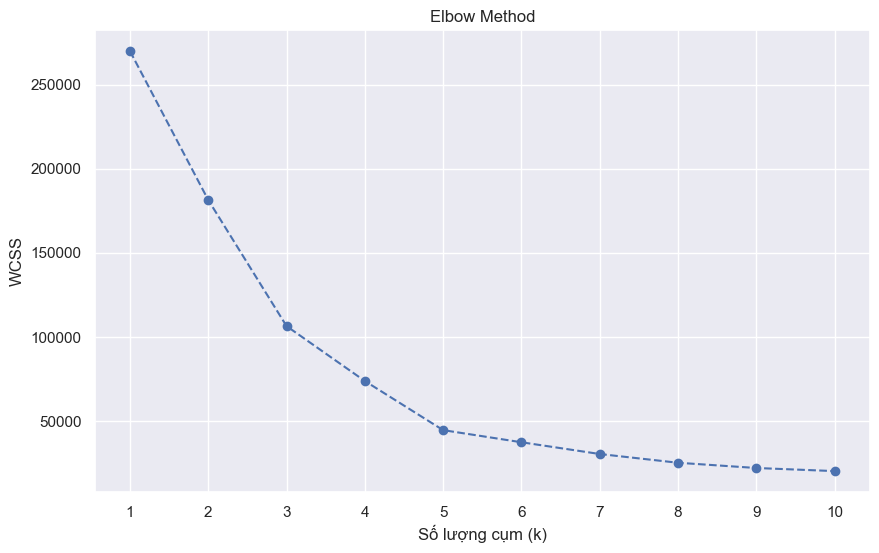

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

k = 5

In [27]:
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_final.fit_predict(X_scaled)
y_kmeans

d:\python\Krish\mlproject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [28]:
df['Cluster'] = y_kmeans

In [29]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Evaluation

In [31]:
score = silhouette_score(X_scaled, y_kmeans)
print(score)

0.5546571631111091


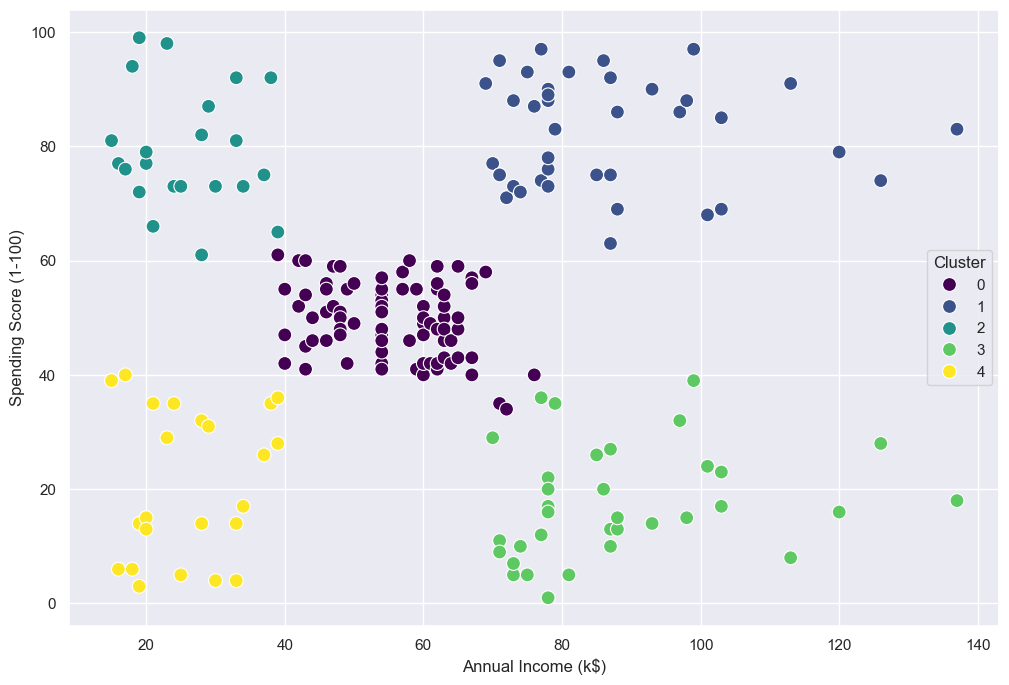

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster' ,data=df, palette='viridis', s=100)
plt.show()

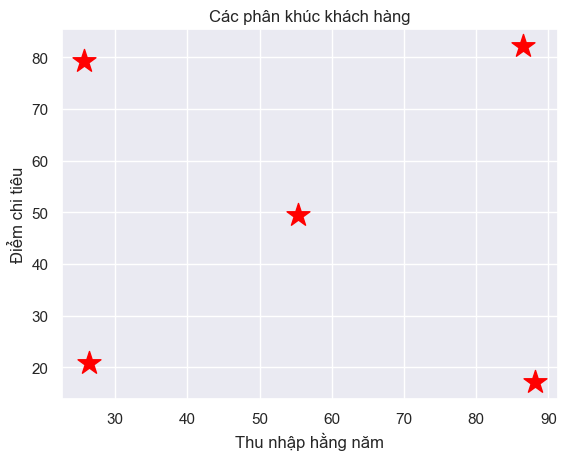

In [33]:
centroids = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids) #Biến đổi ngược

plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Các phân khúc khách hàng')
plt.xlabel('Thu nhập hằng năm')
plt.ylabel('Điểm chi tiêu')
plt.show()